## 👋🛳️ Space Titanic

we are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load modal 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Load evaluation metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load train test split

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

## Data Collection & processing


In [110]:
df=pd.read_csv('./data/spaceship-titanic/train.csv')
df_test=pd.read_csv('./data/spaceship-titanic/test.csv')

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


* `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* `Destination` - The planet the passenger will be debarking to.

* `Age`- The age of the passenger.

* `VIP`- Whether the passenger has paid for special VIP service during the voyage.


In [11]:
# getting info at df
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
# FIND MISSING VALUES

df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

**Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.**

True     4378
False    4315
Name: Transported, dtype: int64

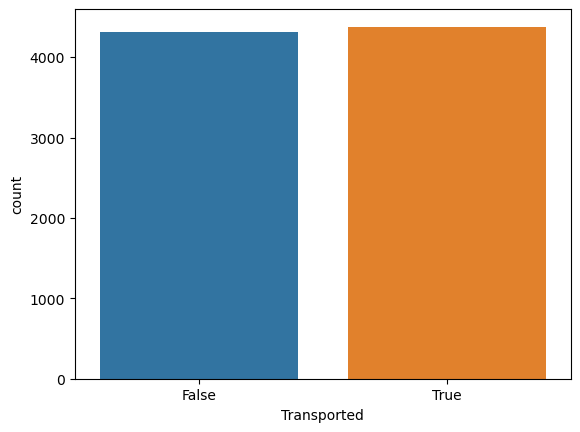

In [17]:
sns.countplot(x='Transported',data=df)

df['Transported'].value_counts()
# we can see almost 50% of people where transported and 50% of people where not transported

# Handling The Missing Value

**PreProcessing the Data**

In [114]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [115]:
# we need to covert categorical features into numerical features

# Transported is our target variable convert it into 0 and 1
#CryoSleep,Vip, -> 0,1 , cabin no need so remove it 
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder();

def pre_process(df):
    # lets drop the Name
    # df.drop('Name',axis=1,inplace=True)
    # Replace False, True with 0,1

    # df['Transported']=df['Transported'].replace({False:0,True:1})

    # lets seprate the cabin Column into three new feaure
    df[["deck","num","side"]]=df["Cabin"].str.split("/",expand=True)

    # lets drop the Cabin column
    df.drop('Cabin',axis=1,inplace=True)

    




pre_process(df)
pre_process(df_test)

In [116]:
object_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype == 'category']
numeric_cols = [col for col in df.columns if df[col].dtype == 'float64']

print(f'Object cols -- {object_cols}')
print(f'Numeric cols -- {numeric_cols}')


Object cols -- ['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'num', 'side']
Numeric cols -- ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [117]:
# now lets add  up the money spent value by passenger, creating a new feature

df['MoneySpent']=df[numeric_cols].sum(axis=1)

df_test['MoneySpent']=df_test[numeric_cols].sum(axis=1)


In [122]:
# convert the object columns into numerical columns 

df[object_cols]=df[object_cols].apply(encoding.fit_transform)
df_test[object_cols]=df_test[object_cols].apply(encoding.fit_transform)



In [123]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,MoneySpent
0,0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,39.0
1,1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1,760.0
2,2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,10441.0
3,3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,5209.0
4,4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1,1107.0


## All the missing values are filled

### Build the Correlation matrix

<AxesSubplot:>

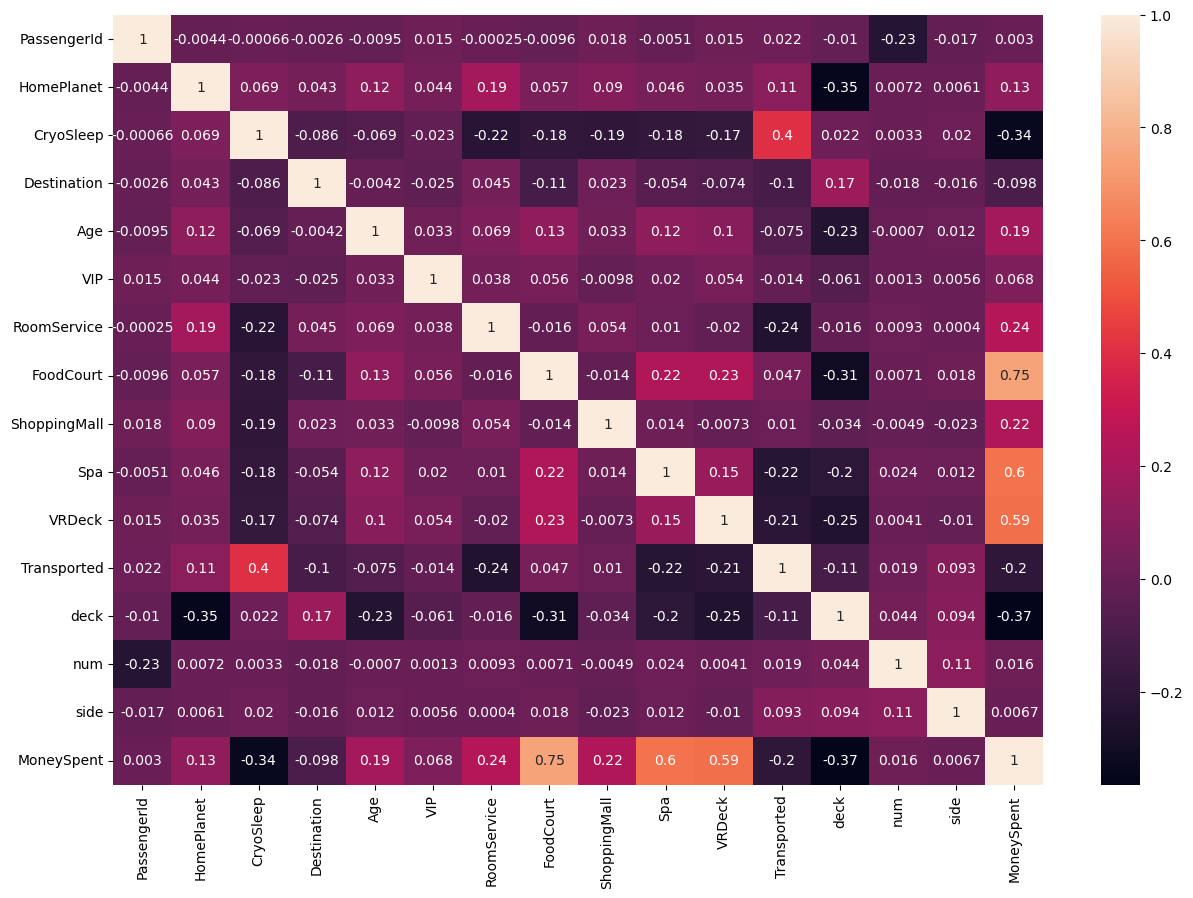

In [124]:

cross_matrix=df.corr()

fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cross_matrix,annot=True)


## Build a model

In [126]:
# Split the data into train and test

X=df.drop(['Transported',"PassengerId"],axis=1)
y=df['Transported']

In [127]:
# split the data into train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [131]:
# Build the model

def model_scores(models):
    np.random.seed(42)
    model_scores={}

    for label,model in models.items():
        model.fit(X_train,y_train)
        model_scores[label]=model.score(X_test,y_test)
       
    
    return model_scores

In [132]:
# model selection

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}


model_scores(models)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   int64  
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   int64  
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 950.9+ KB


# Model Evaluation


In [82]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def Evaluate(y_true,y_preds):
      """
    Performs evaluation comparison on y_true labels vs y_pred labels
    """
      accuracy=accuracy_score(y_true,y_preds)
      precision=precision_score(y_true,y_preds)
      recall=recall_score(y_true,y_preds)
      f1=f1_score(y_true,y_preds)
      metric_dict={"accuracy":round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}

      print(f"Acc:{accuracy*100:.2f} %")
      print(f"Precision:{precision* 100:.2f} %")
      print(f"Recall:{recall* 100:.2f} %")
      print(f"F1:{f1*100:.2f} %")

      return metric_dict



In [84]:

# accuracy on the Train Data
y_preds=models['Random Forest'].predict(X_test)

Evaluate(y_test,y_preds)

Acc:77.00 %
Precision:77.04 %
Recall:77.56 %
F1:77.30 %


{'accuracy': 0.77, 'precision': 0.77, 'recall': 0.78, 'f1': 0.77}

In [85]:
# Hyperparameter tuning

In [87]:
%%time


rf_grid = {
    "n_estimators": np.arange(10,1000,50),
    "max_depth": [None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2),
    "max_features": [0.5,1,"sqrt","auto"],
}

# Instantiate RandomizedSearchCV model
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_grid,n_iter = 100,cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: user 4.51 s, sys: 372 ms, total: 4.88 s
Wall time: 1min 58s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, verbose=2)

In [89]:
rf_random.score(X_test,y_test)

y_preds=rf_random.predict(X_test)

Evaluate(y_test,y_preds)

Acc:78.61 %
Precision:76.30 %
Recall:83.60 %
F1:79.78 %


{'accuracy': 0.79, 'precision': 0.76, 'recall': 0.84, 'f1': 0.8}

In [90]:

# Hyperparameter tuning with GridSearchCV

In [101]:

grid_2 = {"n_estimators": [100, 200, 500],
            "max_depth": [None,3],
            "max_features": ["auto", "sqrt"],
            "min_samples_split": [6],
            "min_samples_leaf": [1, 2]}
np.random.seed(42)
clf = RandomForestClassifier(n_jobs=1)

# setup GridSearchCV

gs_clf = GridSearchCV(estimator=clf,
                        param_grid=grid_2, # what we created above
                        cv=5, # cross validation
                        verbose=2 # print out results
                        )

# fit the GridSearchCV version of clf

gs_clf.fit(X_train, y_train) # it will make validation set automatically

# find the best parameters

gs_clf.best_params_

# evaluate the randomized search RandomForestClassifier model

gs_y_preds = gs_clf.predict(X_train)

# evaluate the predictions

# gs_metrics = Evaluate(y_test, gs_y_preds)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6,

In [97]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.7/25.7 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached scipy-1.10.1-cp39-cp39-macosx_12_0_arm64.whl (28.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 1.9 MB/s eta 0:00:002.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 2.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 2.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.

In [103]:
gs_clf.best_params_


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [133]:
gs_clf.score(X_test,y_test)

/Volumes/Project/software/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MoneySpent
- deck
- num
- side
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB
